In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 500)
pd.set_option('display.precision',0)

In [2]:
dataset = "../labeled_small_training_set.csv"
df = pd.read_csv(dataset)

In [3]:
df.shape

(1730, 16)

In [5]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'helpful_votes',
       'review_age_days', 'annual_HVAR', 'book_num_reviews', 'std_HVAR',
       'top_quartile_HVAR', 'most_helpful'],
      dtype='object')

In [24]:
isinstance('a',str)

True

In [ ]:
def tape_measure(val):
    if isinstance(val,str):
        return val.split()
    else:
        return 0

# How many words are in each review? And in each summary?
df['review_wordcount'] = df.apply(lambda x: tape_measure(x.reviewText), axis = 1)
df['summary_wordcount'] = df.apply(lambda x: tape_measure(x.summary), axis = 1)

In [13]:
df.describe()

,overall,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful,review_wordcount,summary_wordcount
count,1730,2e+03,1730,1730,2e+03,1730,2e+03,2e+03,2e+03,1730,1730
mean,4,1e+09,6,1669,1e+00,8,2e+00,1e+00,3e-01,176,5
std,1,1e+08,40,1285,5e+00,5,5e+00,3e+00,4e-01,196,3
min,1,9e+08,0,366,0e+00,4,2e-02,7e-02,0e+00,16,1
25%,3,1e+09,1,600,2e-01,4,3e-01,5e-01,0e+00,47,2
50%,4,1e+09,1,1117,5e-01,5,6e-01,8e-01,0e+00,113,4
75%,5,1e+09,4,2553,1e+00,8,1e+00,1e+00,1e+00,224,6
max,5,1e+09,1096,5827,1e+02,28,7e+01,3e+01,1e+00,2463,23


In [ ]:
# How should we set our max sent length?
# Does wordcount matter for helpfulness, across strata?
rvw_lengths = pd.DataFrame(data=dict(most=df[df.most_helpful == 1].review_wordcount.describe(),\
                                     least=df[df.most_helpful == 0].review_wordcount.describe()))


In [ ]:
rvw_lengths

In [6]:
df[df.most_helpful==1].overall.value_counts()

5    177
1     94
3     62
4     59
2     47
Name: overall, dtype: int64

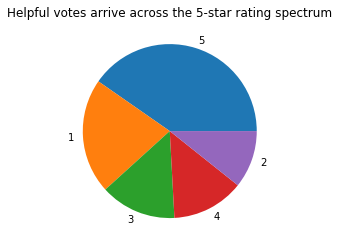

In [7]:
fig1, ax1 = plt.subplots()
pypie = ax1.pie(x=df[df.most_helpful==1].overall.value_counts(),\
                labels=df[df.most_helpful==1].overall.value_counts().index)
_ = ax1.set_title("Helpful votes arrive across the 5-star rating spectrum")

In [7]:
df.quantile(np.arange(0,1,.1))

,overall,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
0.0,1.0,8.356608e+08,0.0,366.0,0.000000,4.0,1.199178e-16,0.000000,0.0
0.1,2.0,1.065053e+09,0.0,477.0,0.000000,5.0,3.691594e-01,0.470984,0.0
0.2,3.0,1.147046e+09,1.0,581.0,0.221034,7.0,5.847245e-01,0.632207,0.0
0.3,4.0,1.204762e+09,1.0,755.0,0.355231,11.0,8.282523e-01,0.763200,0.0
0.4,4.0,1.252109e+09,1.0,999.0,0.501374,15.0,1.130388e+00,0.895639,0.0
0.5,5.0,1.290643e+09,2.0,1336.0,0.655296,21.0,1.507532e+00,1.053545,0.0
0.6,5.0,1.319760e+09,3.0,1782.0,0.823928,30.0,2.025858e+00,1.295161,0.0
0.7,5.0,1.340842e+09,4.0,2330.0,1.108300,44.0,2.794022e+00,1.603004,0.0
0.8,5.0,1.355875e+09,7.0,2998.0,1.697674,72.0,4.090423e+00,2.042337,1.0
0.9,5.0,1.364861e+09,14.0,3947.0,3.108273,145.0,7.222445e+00,2.975543,1.0


In [8]:
df.max()

asin                    B00LAGPONG
overall                          5
reviewTime              2013-07-22
reviewerID           AZZZT14MS21I6
unixReviewTime          1374451200
helpful_votes                23311
review_age_days               6602
annual_HVAR                10263.6
book_num_reviews              2472
std_HVAR                   378.643
top_quartile_HVAR          128.642
most_helpful                     1
dtype: object

Here's an excellent example of people finding a lower rating helpful (Fifty Shades of Grey is the book)

In [18]:
df[df.annual_HVAR > 10000]

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
2360514,0345803485,2,"I really don't like writing bad reviews. I admire people who have the courage to put pen to paper and expose themselves to the whole world, especially those writing erotica. Having just finished this book, however, I feel compelled to write a review.About half way through the book, I looked up the author to see if she was a teenager. I really did because the characters are out of a 16 year old's fantasy. The main male character is a billionaire (not a millionaire but a billionaire) who speak...",2012-04-15,A3JT5XR92IFRVL,meymoon,Did a teenager write this???,1334448000,23311,829,10263.588661,2281,284.17293,3.127295,1


In [19]:
df.overall.value_counts()

5    1366247
4     610546
3     330468
2     187215
1     165248
Name: overall, dtype: int64

In [25]:
df[(df.overall == 4) | (df.overall == 5)].shape[0]/df.overall.value_counts().sum()

0.7432323805026386

In [4]:
df[df.reviewText.str.contains('kid')].head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
51,0060584750,"[2, 2]",5,"Few authors are as capable as Lehane. Possessing stellar technical skills and a grand story-telling vision, he's put together something special with _Mystic River_.Dave, Jimmy and Sean are three Boston kids bound together by a single event: the abduction of Dave by sexual predators posing as cops. Fast forward to the present; Dave is married and struggling with marginal employment; Jimmy is an ex-con trying to make it as a citizen with his ownership of a corner market; and Sean is a homici...",2004-02-09,A1XY3SJZLJIXSI,"D. Ross ""http://directorblue.blogspot.com""",Clever and heart-wrenching,1076284800,2,3817,2e-01,6,3e-01,3e-01,0
64,0060987103,"[1, 1]",5,when my kids were little i used to do the Margaret Hamilton voice all the time for them. they loved it. i have always loved the movie the wizard of oz. to see these books come out i was curious. i think it is a great book and i think Maguire did a good job linking it to the movie.,2013-06-27,A10CZZF3FV81UR,cyprus,wicked witch of the west,1372291200,1,391,9e-01,8,4e-01,9e-01,1
87,0062024027,"[1, 2]",5,I truly loved this book! The author introduced us to some amazing and memorable characters. It's been a while since my house and kids have been neglected because of a book I couldn't put down. I look forward to the next book.,2011-07-29,AUIQUS9CUFIMN,NaN,An amazing page turner,1311897600,1,1090,3e-01,6,3e-02,3e-01,0
94,006207203X,"[2, 2]",5,"In the distant future, society as we know it has collapsed, replaced by a savage and brutal wasteland plagued with electrical storms that torch everything in their path. The world has become divided into two groups. The first are the Dwellers who live in domed cities protected from the outside world. In these cities, the people spend most of their time in the Realms, virtual realities that mimic what the world used to be like and allow the Dwellers to travel from place to place in the blink ...",2012-02-07,A50E1DOWBZYZZ,Amazon Customer,Library Lady Hylary - Hunger Games + Clan of the Cave Bear = Excellence!,1328572800,2,897,8e-01,4,2e-01,8e-01,0
97,006207203X,"[1, 1]",5,"I'd been hearing a ton of buzz about this book, all great, so I was really looking forward to picking it up!UNDER THE NEVER SKY by Veronica Rossi (HarperCollins, January 3, 2012)The good news? The buzz is all deserved! The even better news? I loved this book!Read this book because...1) It's LOGAN'S RUN meets BRAVE NEW WORLD. I know! Two of my very favorite stories meet!2) The writing is tight and completely engaging. This is one I didn't want to put down (and didn't) until I was done.3) I se...",2012-07-23,A2ZUU73I75AMLM,P. J. Hoover,BRAVE NEW WORLD meets LOGAN'S RUN!,1343001600,1,730,5e-01,4,2e-01,8e-01,0
